# ⚠️ EDIT "OPEN IN COLAB" BADGE PRIOR TO DOING ASSIGNMENT

<a target="_blank" href="https://colab.research.google.com/github/BenjaminHerrera/MAT422/blob/main/HW_2.4.ipynb">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# HW 2.4
# Benjamin Herrera
# 6 OCT 2024

# ⚠️ Run these commands prior to running anything

In [ ]:
!pip install scipy
!pip install matplotlib
!pip install numpy

## ✈️🎲🔢 Maximum Likelihood Estimation (MLE) for Random Samples

Let's say we have some sort of function that we want to maximize the likelihood of similarity between a reference distribution $P$ and the function's modeling of the distribution $Q$. When we find a set of parameters that gets us this maximum likelihood of the function to model $P$, we call this set the maximum likelihood estimate. This is sort of similar to minimizing the KL divergence of a generative model's distribution of some reference dataset to the content it is generating.

To define this function, we use the following notation:

$$f(x_1, x_2, x_3, \dots, x_n; \theta_1, \theta_2, \theta_3, \dots, \theta_n)$$

where $\theta_n$ are parameters of the function and $x_n$ are the inputs to the function. The function is also a joint pmf or pdf function. When we find the optimal set of parameters, we call this $\hat{\theta}$. This means that the function with $\hat{\theta}$ has the better estimation of $P$, than a function $\theta$.

Let's take a look at an example of a joint distribution $P$ defined as:

$$f(x_1, x_2) = 4x_1 + 5x_2$$

Here's a code representation of this distribution:

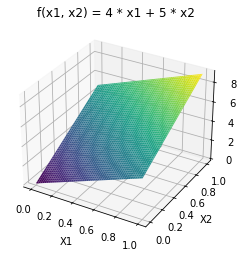

In [8]:
# Import libraries needed
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of x1 and x2 values
x1_range = np.linspace(0, 1, 100)
x2_range = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
F = 4 * X1 + 5 * X2

# Plot the surface and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, F, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(x1, x2)')

# Show the plot
plt.title('f(x1, x2) = 4 * x1 + 5 * x2')
plt.show()

Based off this figure and the function provided, the coefficients are 4 and 5. That means that $\hat{\theta}$ would be 4 and 5. Now if I have a function $g$ that is trying to maximize the likelihood estimation to %f%, and it has the parameter set of $4$ and $4.5$, we can see the difference of every point in that function $g$ to $f$. 

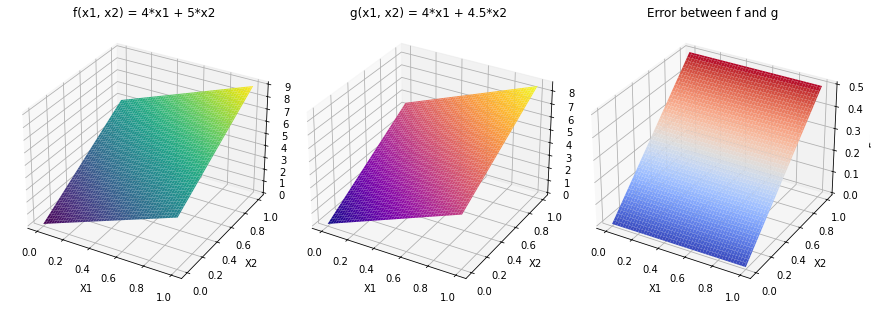

In [19]:
# Create a grid of x1 and x2 values for f
x1_range = np.linspace(0, 1, 100)
x2_range = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
F = 4 * X1 + 5 * X2

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Plot f
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X1, X2, F, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(x1, x2)')
plt.title('f(x1, x2) = 4*x1 + 5*x2')

# Create a grid of x1 and x2 values for g
G = 4 * X1 + 4.5 * X2

# Plot g
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X1, X2, G, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('g(x1, x2)')
plt.title('g(x1, x2) = 4*x1 + 4.5*x2')

# Create the error plane
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X1, X2, F-G, cmap='coolwarm')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Error')
plt.title('Error between f and g')

# Show the plot
plt.tight_layout()
plt.show()

Ideally, you'd want to have a flat plane for the error between $f$ and $g$. With $\hat{\theta}$ parameters, this error plane is flat.

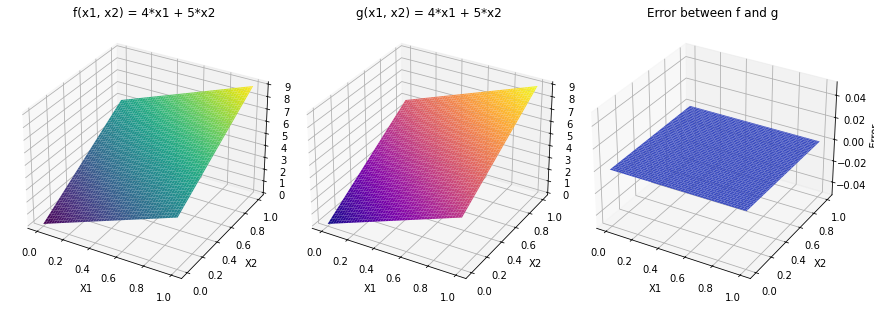

In [21]:
# Create a grid of x1 and x2 values for f
x1_range = np.linspace(0, 1, 100)
x2_range = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1_range, x2_range)
F = 4 * X1 + 5 * X2

# Create the figure
fig = plt.figure(figsize=(12, 8))

# Plot f
ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X1, X2, F, cmap='viridis')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(x1, x2)')
plt.title('f(x1, x2) = 4*x1 + 5*x2')

# Create a grid of x1 and x2 values for g
G = 4 * X1 + 5 * X2

# Plot g
ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X1, X2, G, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('g(x1, x2)')
plt.title('g(x1, x2) = 4*x1 + 5*x2')

# Create the error plane
ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X1, X2, F-G, cmap='coolwarm')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Error')
plt.title('Error between f and g')

# Show the plot
plt.tight_layout()
plt.show()

Although the chapter shows the concept of the notion between $\hat{\theta}$ and $\theta$ as:

$$f(x_1, \dots, x_n; \hat{\theta_1}, \dots, \hat{\theta_n}) \geq f(x_1, \dots, x_n; \theta_1, \dots, \theta_n) $$

The idea still stands with the above demonstrations as we are trying to minimize the error, **increasing** the likelihood of the function $g$ to the distribution $P$ ($f(X)$)

If our distribution is instead a normal distribution, our likelihood function turns a different story. Instead of a linear format like the one above done as an example, our likelihood function now looks like this:

$$f(x_1, \dots, x_n ; \mu, \sigma^2) = (\frac{1}{2\pi \sigma^2})^{\frac{n}{2}}e^{-\sum\frac{x_i - \mu^2}{2\sigma^2}}$$

where $\mu$ is the population mean and $\sigma^2$ is the variance. When we try to solve the MLE for this, we find that:

1. the optimal population mean is the same as the mean across each respective joint variable
2. the optimal variance is equal to the MSE of each value of the $X$ to the mean across each respective joint variable

## 📈 Linear Regression

We all know linear regression. In fact, we touched some light of it in Chapter 1. And in this part of this chapter, we'll go back to it again, but this time with a probabilistic perspective. To recap, given a dataset $\{(x_i, y_i)\}^n$ of $n$ samples with each sample having a feature and a ground truth, we want to find the parameters of a function $f$ that minimizes the squared error of the model's prediction.

Using MLE and the normal distribution perspective, we want to minimize the parameters of a function $\theta$ where it satisfies:

$$\hat{\theta} = \arg \max p(\theta | y) = \arg \max_{\theta} \sum_{i=1}^{n} (y_i - \hat{y_i})^2$$

This is another representation of the least square problem from Chapter 1! 